In [79]:
import io
import pydotplus
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image 

import matplotlib.pyplot as plt
%matplotlib inline

## Decision Tree Classifier Example
You can just ignore this, but I'll leave it anyways for reference I guess

In [81]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [82]:
dtree=DecisionTreeClassifier()
dtree.fit(df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

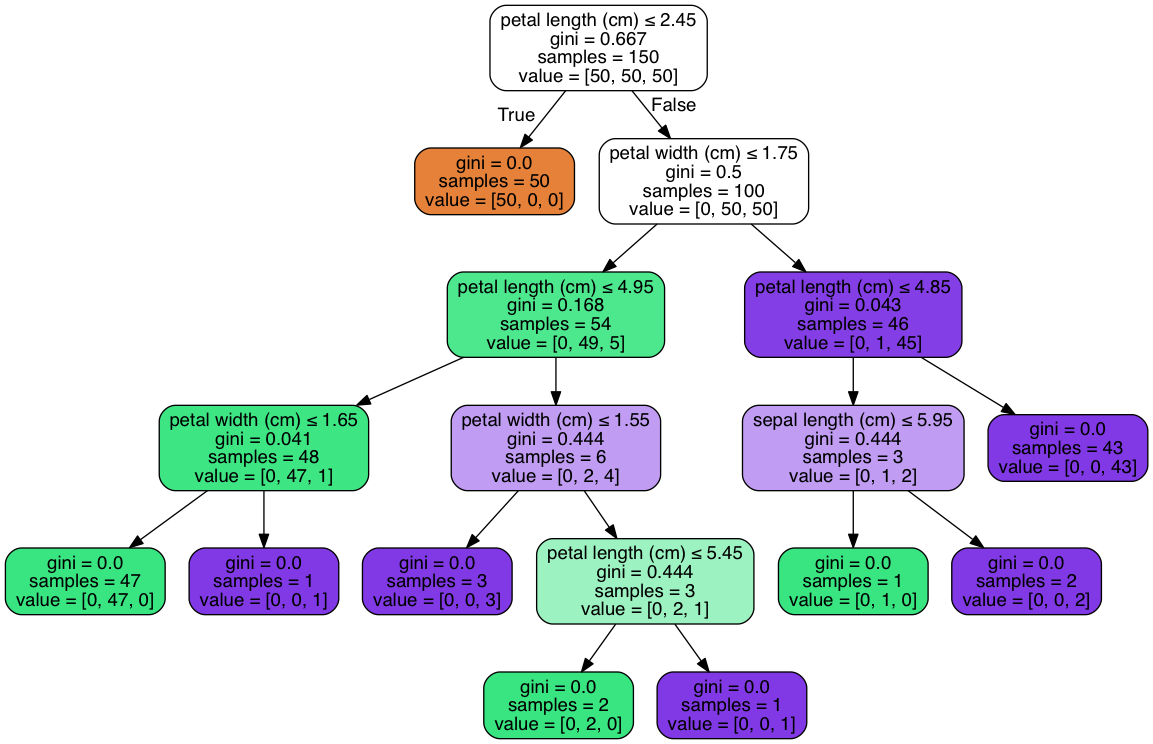

In [83]:
dot_data = io.StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## MTA-Weather Regression

In [85]:
df = pd.read_csv('final_dataset.csv').drop(columns=['Unnamed: 0'])
df = df.dropna()
df.head()

STATION        Date  TIMEINT     ENTRIES  Temperature  Humidity  Heavy Rain  \
0    1 AV  2016-01-01        1  1407774726       41.275      53.5         0.0   
1    1 AV  2016-01-01        1  1407774726       34.000      48.5         0.0   
2    1 AV  2016-01-01        1  1407774726       35.775      52.5         0.0   
3    1 AV  2016-01-01        1  1407774726       35.275      55.0         0.0   
4  103 ST  2016-01-01        1   124276833       41.275      53.5         0.0   

   Heavy Snow  Light Freezing Fog  Light Freezing Rain  ...    Light Snow  \
0         0.0                 0.0                  0.0  ...           0.0   
1         0.0                 0.0                  0.0  ...           0.0   
2         0.0                 0.0                  0.0  ...           0.0   
3         0.0                 0.0                  0.0  ...           0.0   
4         0.0                 0.0                  0.0  ...           0.0   

   Mostly Cloudy  Overcast  Partly Cloudy  Rain  Scattered Clouds  Snow  Haze  \
0           0.00      1.00           0.00   0.0               0.0   0.0   0.0   
1           0.25      0.00           0.00   0.0               0.0   0.0   0.0   
2           0.00      0.00           0.00   0.0               0.0   0.0   0.0   
3           0.00      0.75           0.25   0.0               0.0   0.0   0.0   
4           0.00      1.00           0.00   0.0               0.0   0.0   0.0   

   Fog  Clear  
0  0.0   0.00  
1  0.0   0.75  
2  0.0   1.00  
3  0.0   0.00  
4  0.0   0.00  

[5 rows x 21 columns]

In [86]:
# Get all weather condition columns
conditions = df.drop(columns=['Date', 'STATION', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity']).columns
conditions

Index(['Heavy Rain', 'Heavy Snow', 'Light Freezing Fog', 'Light Freezing Rain',
       'Light Rain', 'Light Snow', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'Rain', 'Scattered Clouds', 'Snow', 'Haze', 'Fog',
       'Clear'],
      dtype='object')

In [87]:
# Get the total count for each weather condition
df[conditions].sum(axis=0).sort_values(ascending=False)

Clear                  389677.681415
Overcast               155932.266694
Mostly Cloudy           53950.601414
Partly Cloudy           44734.129899
Scattered Clouds        29543.705292
Light Rain              27458.274922
Haze                    15816.566129
Rain                     5110.570286
Light Snow               4368.866027
Heavy Rain               2097.418917
Snow                     1845.190322
Heavy Snow                518.222321
Light Freezing Rain       269.973333
Fog                       108.857143
Light Freezing Fog         83.595506
dtype: float64

In [88]:
# Merge the weather conditions
df['Rain'] += df['Heavy Rain'] + df['Light Rain'] + df['Light Freezing Rain']
df['Snow'] += df['Heavy Snow'] + df['Light Snow']
df['Cloudy'] = (df['Partly Cloudy'] + df['Scattered Clouds'] + df['Mostly Cloudy']
                + df['Overcast'] + df['Fog'] + df['Haze'] + df['Light Freezing Fog'])

# Get rid of columns that we don't want
df = df.drop(columns=[c for c in conditions if c not in ['Rain', 'Snow', 'Cloudy', 'Clear']])
df.head()

STATION        Date  TIMEINT     ENTRIES  Temperature  Humidity  Rain  Snow  \
0    1 AV  2016-01-01        1  1407774726       41.275      53.5   0.0   0.0   
1    1 AV  2016-01-01        1  1407774726       34.000      48.5   0.0   0.0   
2    1 AV  2016-01-01        1  1407774726       35.775      52.5   0.0   0.0   
3    1 AV  2016-01-01        1  1407774726       35.275      55.0   0.0   0.0   
4  103 ST  2016-01-01        1   124276833       41.275      53.5   0.0   0.0   

   Clear  Cloudy  
0   0.00    1.00  
1   0.75    0.25  
2   1.00    0.00  
3   0.00    1.00  
4   0.00    1.00

In [89]:
# Print  total number of stations
# df['STATION'].unique(), len(df['STATION'].unique())

In [90]:
# Extract features and result
# df = df[:100]
X = df.drop(columns=['Date', 'STATION', 'TIMEINT', 'ENTRIES'])
y = df['ENTRIES']
print(X.shape)
print(y.head())
X.head()

(759094, 6)
0    1407774726
1    1407774726
2    1407774726
3    1407774726
4     124276833
Name: ENTRIES, dtype: int64


Temperature  Humidity  Rain  Snow  Clear  Cloudy
0       41.275      53.5   0.0   0.0   0.00    1.00
1       34.000      48.5   0.0   0.0   0.75    0.25
2       35.775      52.5   0.0   0.0   1.00    0.00
3       35.275      55.0   0.0   0.0   0.00    1.00
4       41.275      53.5   0.0   0.0   0.00    1.00

In [97]:
# Train model
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

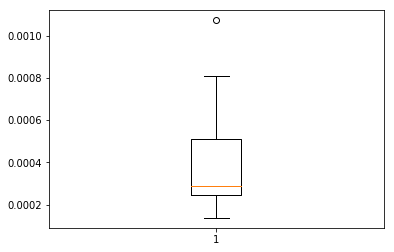

In [101]:
cv = cross_val_score(dtree, X, y, cv=KFold(n_splits=10, random_state=123456))
plt.boxplot([-cv]);

In [95]:
# Print out feature importance
list(sorted(zip(X.columns, dtree.feature_importances_), key=lambda a: -a[1]))

[('Temperature', 0.59234530904773275),
 ('Humidity', 0.28573698217165699),
 ('Cloudy', 0.089961505952384349),
 ('Snow', 0.031956202828225852),
 ('Rain', 0.0),
 ('Clear', 0.0)]

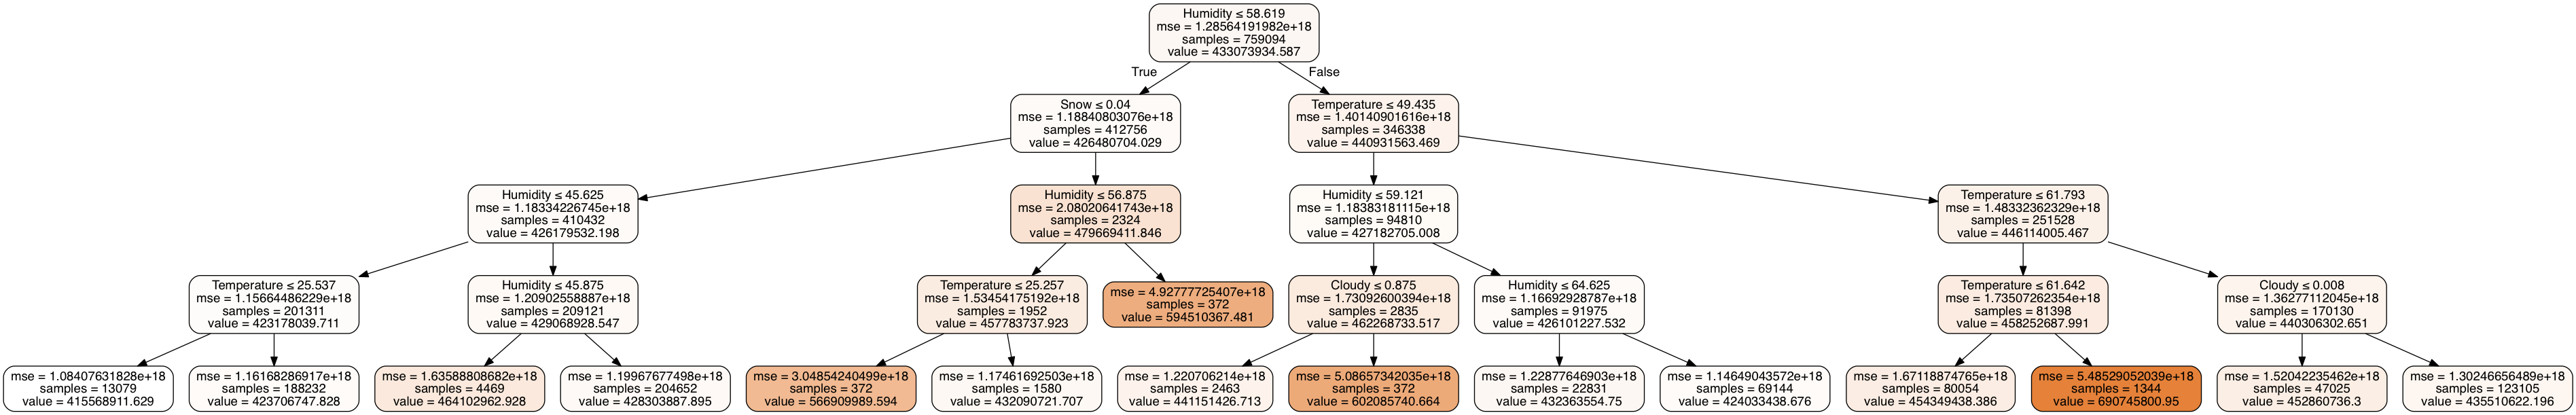

In [96]:
# Draw decision tree graph
dot_data = io.StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Define list of models to test
models = [
    # Replace these with desired models...
    ('lin SVM', SVC(kernel="linear", C=0.025)),
    ('rbf SVM', SVC(gamma=2, C=1)),
    ('LogR', LogisticRegression()),
    ('MLP', MLPClassifier(alpha=1)),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier(5)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('DTree', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ('Ada', AdaBoostClassifier())
]
names = [n for n, m in models]

In [ ]:
# View cross validation results - accuracy ean and standard deviation
results = []
for name, model in models:
    t = time.time()
    cv_result = cross_val_score(model, X, Y, cv=KFold(n_splits=10, random_state=seed))
    results.append(cv_result)
    print('{}: {:.4f} (std: {:.4f}) took {:.2f}s'.format(name, cv_result.mean(), cv_result.std(), time.time() - t))

# boxplot algorithm comparison
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(names))+1, names)
plt.savefig('results/clsf-comparison-{}.png'.format(len(models)));